# Exercices Astropy

Les modules Astropy suivants seront, pour la plupart très partiellement, utilisés dans ces exercices :
  - `astropy.constants` : constants useful in Astronomy
  - `astropy.units` : everything related to physical quantities
  - `astropy.table` : store and manipulate heterogeneous tables
  - `astropy.coordinates` : celestial/spatial coordinates, tools for converting between common coordinate systems
  - `astropy.wcs` : WCS transformations in FITS files
  - `astropy.io.fits` : access to FITS files
  - `astropy.io.misc` : IO routines (HDF5, YAML, pickle)

## Exercice 1 - charger une table et appliquer des filtres

Le fichier `HDF5` suivant, téléchargeable en ligne, contient plusieurs catalogues de données CFHT réduites par le stack LSST.

        https://github.com/nicolaschotard/lsst_drp_analysis/blob/master/python/testdata.hdf5?raw=true
        
1. Téléchargez-le ([doc](http://docs.astropy.org/en/stable/utils/)) ou récupérez-le directement [sur github](https://github.com/nicolaschotard/lsst_drp_analysis/blob/master/python/testdata.hdf5)
2. Ce fichier hdf5 contient un catalogue dont le `path` (nom de la clé dans le langage HDF5) est `deepCoadd_forced_src` ([doc](http://docs.astropy.org/en/v0.2.1/table/io.html)). Chargez-le et créer une table `astropy`.
3. Visualiser le contenue de la table, afficher le nombre de colonnes et le nombre de lignes, chaque ligne correspondant à un objet (étoiles ou galaxies).
4. Dans ce catalogue, les magnitudes sont définies par la clé `modelfit_CModel_mag`, et les filtres du CFHT par la clé `filter`. Afficher dans une unique figure les distributions des magnitudes pour les 2 filtres du CFHT disponible ici(u, et i). Attention, certaines magnitudes ont pour valeur des NaN (Not a Number), et devront tout d'abord être filtrées (voir `np.isfinite`).
5. Refaire cette figure en supprimant tout les objets dont l'erreur sur la magnitudes (`modelfit_CModel_magSigma`) est supérieurs ou égale à `0.05 mag`.
6. Afficher la carte du ciel (ra vs dec) pour tout ces objets (`coord_ra_deg`, `coord_dec_deg`).        

In [1]:
# Initialisation de matplotlib et numpy
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. Téléchargement du fichier de données
from astropy.utils.data import download_file
f = 'https://github.com/nicolaschotard/lsst_drp_analysis/blob/master/python/testdata.hdf5?raw=true'
mon_fichier = download_file(f)

In [3]:
# 2. Chargemment du catalogue dans une table astropy
from astropy.table import Table
table = Table.read(mon_fichier, path='deepCoadd_forced_src')

In [4]:
# 3. Visualisation de la table
table

modelfit_CModel_dev_flux_inner,modelfit_CModel_fluxSigma,modelfit_CModel_initial_flag_apCorr,modelfit_CModel_apCorrSigma,modelfit_CModel_flux_inner,modelfit_CModel_initial_flag_numericError,modelfit_CModel_exp_flag_badReference,modelfit_CModel_dev_fluxSigma,modelfit_CModel_flux,modelfit_CModel_flag_badReference,objectId,modelfit_CModel_dev_flux,modelfit_CModel_initial_flux,modelfit_CModel_flag_noShapeletPsf,modelfit_CModel_exp_apCorr,modelfit_CModel_apCorr,modelfit_CModel_fracDev,modelfit_CModel_initial_flag_badReference,modelfit_CModel_initial_flag,modelfit_CModel_flag_region_maxBadPixelFraction,modelfit_CModel_flag,modelfit_CModel_exp_fluxSigma,modelfit_CModel_initial_apCorrSigma,modelfit_CModel_exp_flag,modelfit_CModel_flag_region_maxArea,modelfit_CModel_flag_badCentroid,modelfit_CModel_dev_apCorr,modelfit_CModel_initial_flux_inner,modelfit_CModel_dev_flag_badReference,coord_ra,tract,modelfit_CModel_exp_flux_inner,modelfit_CModel_exp_flag_apCorr,modelfit_CModel_dev_apCorrSigma,modelfit_CModel_initial_fluxSigma,modelfit_CModel_dev_flag_numericError,modelfit_CModel_dev_flag_apCorr,modelfit_CModel_initial_apCorr,modelfit_CModel_flag_apCorr,patch,filter,modelfit_CModel_objective,modelfit_CModel_exp_apCorrSigma,coord_dec,modelfit_CModel_dev_flag,modelfit_CModel_exp_flag_numericError,modelfit_CModel_exp_flux,modelfit_CModel_mag,modelfit_CModel_magSigma,modelfit_CModel_dev_mag,modelfit_CModel_dev_magSigma,modelfit_CModel_initial_mag,modelfit_CModel_initial_magSigma,modelfit_CModel_exp_mag,modelfit_CModel_exp_magSigma,x_Src,y_Src,coord_ra_deg,coord_dec_deg
float64,float64,bool,float64,float64,bool,bool,float64,float64,bool,int64,float64,float64,bool,float64,float64,float64,bool,bool,bool,bool,float64,float64,bool,bool,bool,float64,float64,bool,float64,int64,float64,bool,float64,float64,bool,bool,float64,bool,bytes3,bytes1,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280961,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.95000655662,0,nan,True,nan,nan,False,True,nan,True,"1,3",u,nan,nan,-0.169503081795,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6107.0,11911.0,340.910263769,-9.71181120133
nan,nan,True,nan,nan,False,False,nan,nan,True,1099914280962,nan,nan,False,nan,nan,nan,False,True,True,True,nan,nan,True,False,False,nan,nan,False,5.94954253012,0,nan,True,nan,nan,False,True,nan,True,"1,3",u,nan,nan,-0.16950913956,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6617.0,11905.0,340.88367701,-9.71215828568
nan,nan,True,nan,nan,False,False,nan,nan,True,1099914280963,nan,nan,False,nan,nan,nan,False,True,True,True,nan,nan,True,False,False,nan,nan,False,5.94947883881,0,nan,True,nan,nan,False,True,nan,True,"1,3",u,nan,nan,-0.169509229636,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6687.0,11905.0,340.880027766,-9.71216344665
1.2238184989,0.620667116148,True,nan,1.22381837283,False,False,0.620667049202,1.646709411,False,1099914280964,1.64670925588,1.48702485256,False,nan,nan,1.0,False,False,False,False,0.543752068165,nan,False,False,False,nan,1.23642581277,False,5.94934689405,0,1.19399577963,True,nan,0.557977720917,False,True,nan,True,"1,3",u,0.144015733971,nan,-0.169500445455,False,False,1.42536906499,26.4584575812,0.409228704593,26.4584576835,0.409228699004,26.5692044327,0.407401807715,26.6151816775,0.414188382028,6832.0,11915.0,340.872467888,-9.71166015016
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280965,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.94895929115,0,nan,True,nan,nan,False,True,nan,True,"1,3",u,nan,nan,-0.169505454883,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,7258.0,11910.0,340.850259878,-9.71194716925
nan,nan,True,nan,nan,False,False,nan,nan,False,1099914280966,nan,nan,False,nan,nan,nan,False,True,True,True,nan,nan,True,False,False,nan,nan,False,5.94891105899,0,nan,True,nan,nan,False,T

In [5]:
len(table.colnames), table.colnames

(59,
 ['modelfit_CModel_dev_flux_inner',
  'modelfit_CModel_fluxSigma',
  'modelfit_CModel_initial_flag_apCorr',
  'modelfit_CModel_apCorrSigma',
  'modelfit_CModel_flux_inner',
  'modelfit_CModel_initial_flag_numericError',
  'modelfit_CModel_exp_flag_badReference',
  'modelfit_CModel_dev_fluxSigma',
  'modelfit_CModel_flux',
  'modelfit_CModel_flag_badReference',
  'objectId',
  'modelfit_CModel_dev_flux',
  'modelfit_CModel_initial_flux',
  'modelfit_CModel_flag_noShapeletPsf',
  'modelfit_CModel_exp_apCorr',
  'modelfit_CModel_apCorr',
  'modelfit_CModel_fracDev',
  'modelfit_CModel_initial_flag_badReference',
  'modelfit_CModel_initial_flag',
  'modelfit_CModel_flag_region_maxBadPixelFraction',
  'modelfit_CModel_flag',
  'modelfit_CModel_exp_fluxSigma',
  'modelfit_CModel_initial_apCorrSigma',
  'modelfit_CModel_exp_flag',
  'modelfit_CModel_flag_region_maxArea',
  'modelfit_CModel_flag_badCentroid',
  'modelfit_CModel_dev_apCorr',
  'modelfit_CModel_initial_flux_inner',
  'model

In [6]:
# filter pour ne garder que le filtre 'i'
mask = table['filter'] == 'i'
mask

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [7]:
table[mask]

modelfit_CModel_dev_flux_inner,modelfit_CModel_fluxSigma,modelfit_CModel_initial_flag_apCorr,modelfit_CModel_apCorrSigma,modelfit_CModel_flux_inner,modelfit_CModel_initial_flag_numericError,modelfit_CModel_exp_flag_badReference,modelfit_CModel_dev_fluxSigma,modelfit_CModel_flux,modelfit_CModel_flag_badReference,objectId,modelfit_CModel_dev_flux,modelfit_CModel_initial_flux,modelfit_CModel_flag_noShapeletPsf,modelfit_CModel_exp_apCorr,modelfit_CModel_apCorr,modelfit_CModel_fracDev,modelfit_CModel_initial_flag_badReference,modelfit_CModel_initial_flag,modelfit_CModel_flag_region_maxBadPixelFraction,modelfit_CModel_flag,modelfit_CModel_exp_fluxSigma,modelfit_CModel_initial_apCorrSigma,modelfit_CModel_exp_flag,modelfit_CModel_flag_region_maxArea,modelfit_CModel_flag_badCentroid,modelfit_CModel_dev_apCorr,modelfit_CModel_initial_flux_inner,modelfit_CModel_dev_flag_badReference,coord_ra,tract,modelfit_CModel_exp_flux_inner,modelfit_CModel_exp_flag_apCorr,modelfit_CModel_dev_apCorrSigma,modelfit_CModel_initial_fluxSigma,modelfit_CModel_dev_flag_numericError,modelfit_CModel_dev_flag_apCorr,modelfit_CModel_initial_apCorr,modelfit_CModel_flag_apCorr,patch,filter,modelfit_CModel_objective,modelfit_CModel_exp_apCorrSigma,coord_dec,modelfit_CModel_dev_flag,modelfit_CModel_exp_flag_numericError,modelfit_CModel_exp_flux,modelfit_CModel_mag,modelfit_CModel_magSigma,modelfit_CModel_dev_mag,modelfit_CModel_dev_magSigma,modelfit_CModel_initial_mag,modelfit_CModel_initial_magSigma,modelfit_CModel_exp_mag,modelfit_CModel_exp_magSigma,x_Src,y_Src,coord_ra_deg,coord_dec_deg
float64,float64,bool,float64,float64,bool,bool,float64,float64,bool,int64,float64,float64,bool,float64,float64,float64,bool,bool,bool,bool,float64,float64,bool,bool,bool,float64,float64,bool,float64,int64,float64,bool,float64,float64,bool,bool,float64,bool,bytes3,bytes1,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280961,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.95000655662,0,nan,True,nan,nan,False,True,nan,True,"1,3",i,nan,nan,-0.169503081795,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6107.0,11911.0,340.910263769,-9.71181120133
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280962,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.94954253012,0,nan,True,nan,nan,False,True,nan,True,"1,3",i,nan,nan,-0.16950913956,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6617.0,11905.0,340.88367701,-9.71215828568
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280963,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.94947883881,0,nan,True,nan,nan,False,True,nan,True,"1,3",i,nan,nan,-0.169509229636,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,6687.0,11905.0,340.880027766,-9.71216344665
6.63151756567,0.712926853509,True,nan,6.63151693344,False,False,0.712926942136,8.22245360535,False,1099914280964,8.22245341957,7.5206356801,False,nan,nan,1.0,False,False,False,False,0.628761324432,nan,False,False,False,nan,6.85109740732,False,5.94934689405,0,6.5629844015,True,nan,0.654426645058,False,True,nan,True,"1,3",i,0.307440844015,nan,-0.169500445455,False,False,7.17127961652,24.7124964208,0.0941386273917,24.7124964453,0.0941386412214,24.809363623,0.0944780111844,24.8610083588,0.09519485651,6832.0,11915.0,340.872467888,-9.71166015016
nan,nan,True,nan,nan,False,True,nan,nan,True,1099914280965,nan,nan,False,nan,nan,nan,True,True,False,True,nan,nan,True,False,False,nan,nan,True,5.94895929115,0,nan,True,nan,nan,False,True,nan,True,"1,3",i,nan,nan,-0.169505454883,True,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,7258.0,11910.0,340.850259878,-9.71194716925
31.6941918887,0.7477270623,True,nan,31.7217750549,False,False,0.750316981367,36.9485416427,False,1099914280966,37.0733804741,46.5419675716,False,nan,nan,0.95099129689,False,False,False,Fals

In [8]:
magi = table[mask]['modelfit_CModel_mag']

In [9]:
# Récupérer la liste des fitlres
print(table['filter'])

filter
------
     u
     u
     u
     u
     u
     u
     u
     u
     u
     u
   ...
     i
     i
     i
     i
     i
     i
     i
     i
     i
     i
     i
Length = 68784 rows


In [10]:
print(set(table['filter']))

{'u', 'i'}


In [11]:
filters = set(table['filter'])

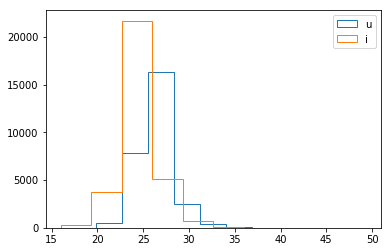

In [12]:
# Comprehension list pour récupérer les magnitudes
mags = [table[table['filter'] == f]['modelfit_CModel_mag'] for f in filters]

# Histogramme pour tout les filtres
fig, ax = plt.subplots()
for mag, filt in zip(mags, filters):
    # Supprimer les nan en appliquant un mask estimé à la volée
    mag = mag[np.isfinite(mag)] 
    ax.hist(mag, label=filt, histtype='step')
ax.legend()

/home/chotard/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


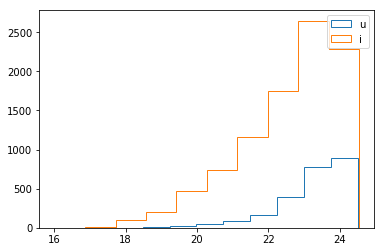

In [13]:
# Comprehension list pour récupérer les magnitudes
mask = np.isfinite(table['modelfit_CModel_mag'])
mask &= table['modelfit_CModel_magSigma'] < 0.05
table = table[mask]
mags = [table[table['filter'] == f]['modelfit_CModel_mag'] for f in filters]
magsSigma = [table[table['filter'] == f]['modelfit_CModel_magSigma'] for f in filters]

# Histogramme pour tout les filtres
fig, ax = plt.subplots()
for mag, magS, filt in zip(mags, magsSigma, filters):
    ax.hist(mag, label=filt, histtype='step')
ax.legend()

## Exercice 2 - Coordonnées

1. Dans cette zone du ciel se trouve l'amas de galaxie MACSJ2243.3-0935. Récupérer ses coordonnées en utilisant le module `coordinates.SkyCoord`. En utilisant les modules `coordinates.SkyCoord` et `units` d'Astropy, calculer les séparations angulaires de tout les objets du catalogues au centre de l'amas de galaxie
    
2. Tracer la carte du ciel (`ra` vs. `dec`), avant et après l'application d'un filtre pour ne conserver que la zone du ciel dans un rayon de 0.05 deg autour du centre de l'amas.
3. Créez un "faux" catalogue de référence à partir de l'original selon la recette suivante

        nra = ra[100:200] + (np.random.random(100) / 10000.) * u.deg
        ndec = dec[100:200] + (np.random.random(100) / 10000.) * u.deg        

   Faire une match du nouveau catalogue sur l'ancien en utilisant une méthode du module SkyCoord.
4. Tracer l'histogramme des distances du catalogue initial au (faux) catalogue de référence en `mas`.
5. Crées une nouvelle table astropy pour ce nouveau (faux) catalogue contenant les données des objets les plus proches dans le premier catalogue (toute les clés). 
6. Ajouter 3 colonnes contenant les sorties de la méthode de match
7. Sauvegarder votre nouveaux catalogue dans un fichier HDF5.

In [14]:
from astropy.coordinates import SkyCoord
from astropy import units as u
amas_coord = SkyCoord.from_name('MACSJ2243.3-0935')

In [15]:
ra = table['coord_ra_deg'] * u.deg
dec = table['coord_dec_deg'] * u.deg
sep = amas_coord.separation(SkyCoord(ra, dec))

In [16]:
mask = sep.deg < 0.05

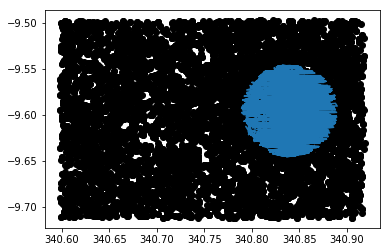

In [17]:
plt.plot(ra, dec, 'ok')
plt.plot(ra[mask], dec[mask])

In [18]:
nra = ra[100:200] + (np.random.random(100) / 10000.) * u.deg
ndec = dec[100:200] + (np.random.random(100) / 10000.) * u.deg

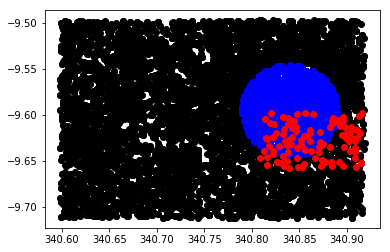

In [19]:
plt.plot(ra, dec, 'ok')
plt.plot(ra[mask], dec[mask], 'ob')
plt.plot(nra, ndec, 'or')

In [20]:
coords = SkyCoord(ra, dec, unit='deg')
fakecat = SkyCoord(nra, ndec, unit='deg')
idx, d2d, d3d = fakecat.match_to_catalog_sky(coords)

In [21]:
from astropy import units as u
d2d = d2d.value * u.deg

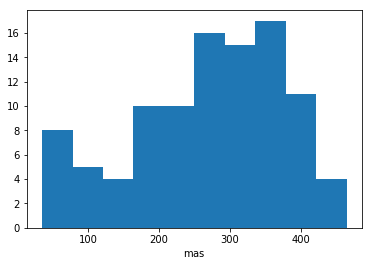

In [22]:
from astropy.visualization import quantity_support
with quantity_support():
    plt.hist(d2d.to('mas'))

In [25]:
bad = np.where(d2d.to('mas') > 300 * u.mas)
bad

(array([ 1,  2,  7, 12, 13, 14, 17, 18, 21, 22, 24, 25, 26, 27, 30, 33, 34,
        38, 40, 43, 45, 47, 48, 50, 51, 53, 54, 58, 61, 63, 67, 68, 70, 71,
        73, 75, 78, 80, 81, 87, 90, 91, 92, 93, 94, 96, 98]),)

In [27]:
idx  # indice dans la catalogue 1 des matches du (faux) catalogues de références

array([ 458,  459, 2668, 1192,  104,  105, 1200,  107, 2677, 1210,  110,
       1214,  112, 2690, 1221, 2691,  116,  117, 1245, 1247,  485,  486,
        488, 1263, 2787, 2790,  126,  498,  128,  500,  130, 1303,  132,
        133,  134, 2851,  509,  510,  138,  139,  140,  141,  142,  517,
       1356, 2902, 2904,  525,  527,  149,  150, 1383,  152,  153,  154,
        155, 1401,  157, 2968, 1407, 2996, 2998,  162,  547, 1437,  165,
        166, 1447,  168,  169,  554,  171, 1483,  173, 1489,  557,  176,
        177, 1500, 1512, 3146, 1518,  574, 1520,  184,  185, 1531,  587,
        188, 1542, 3219,  191,  595, 3257, 3284,  601,  196,  603, 1596,
       1597])

In [28]:
ntable = table[idx]

In [29]:
from astropy.table import Column
cols = [Column(idx, name='idx'), Column(d2d, name='2d2'), Column(d3d, 'd3d')]
ntable.add_columns(cols)

In [34]:
ntable

modelfit_CModel_dev_flux_inner,modelfit_CModel_fluxSigma,modelfit_CModel_initial_flag_apCorr,modelfit_CModel_apCorrSigma,modelfit_CModel_flux_inner,modelfit_CModel_initial_flag_numericError,modelfit_CModel_exp_flag_badReference,modelfit_CModel_dev_fluxSigma,modelfit_CModel_flux,modelfit_CModel_flag_badReference,objectId,modelfit_CModel_dev_flux,modelfit_CModel_initial_flux,modelfit_CModel_flag_noShapeletPsf,modelfit_CModel_exp_apCorr,modelfit_CModel_apCorr,modelfit_CModel_fracDev,modelfit_CModel_initial_flag_badReference,modelfit_CModel_initial_flag,modelfit_CModel_flag_region_maxBadPixelFraction,modelfit_CModel_flag,modelfit_CModel_exp_fluxSigma,modelfit_CModel_initial_apCorrSigma,modelfit_CModel_exp_flag,modelfit_CModel_flag_region_maxArea,modelfit_CModel_flag_badCentroid,modelfit_CModel_dev_apCorr,modelfit_CModel_initial_flux_inner,modelfit_CModel_dev_flag_badReference,coord_ra,tract,modelfit_CModel_exp_flux_inner,modelfit_CModel_exp_flag_apCorr,modelfit_CModel_dev_apCorrSigma,modelfit_CModel_initial_fluxSigma,modelfit_CModel_dev_flag_numericError,modelfit_CModel_dev_flag_apCorr,modelfit_CModel_initial_apCorr,modelfit_CModel_flag_apCorr,patch,filter,modelfit_CModel_objective,modelfit_CModel_exp_apCorrSigma,coord_dec,modelfit_CModel_dev_flag,modelfit_CModel_exp_flag_numericError,modelfit_CModel_exp_flux,modelfit_CModel_mag,modelfit_CModel_magSigma,modelfit_CModel_dev_mag,modelfit_CModel_dev_magSigma,modelfit_CModel_initial_mag,modelfit_CModel_initial_magSigma,modelfit_CModel_exp_mag,modelfit_CModel_exp_magSigma,x_Src,y_Src,coord_ra_deg,coord_dec_deg,idx,2d2,d3d
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,
float64,float64,bool,float64,float64,bool,bool,float64,float64,bool,int64,float64,float64,bool,float64,float64,float64,bool,bool,bool,bool,float64,float64,bool,bool,bool,float64,float64,bool,float64,int64,float64,bool,float64,float64,bool,bool,float64,bool,bytes3,bytes1,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64
12.124650021,0.570660536808,True,nan,12.2413831984,False,False,0.628060816787,14.1163449833,False,1099914292820,15.4242224746,14.8975441133,False,nan,nan,0.0,False,False,False,False,0.57066055188,nan,False,False,False,nan,12.9054652041,False,5.9487698442,0,12.2413811217,True,nan,0.596296993342,False,True,nan,True,"1,3",u,0.242534478709,nan,-0.16855833144,False,False,14.1163465661,24.1256943416,0.043891446842,24.0294917981,0.0442102263956,24.0672132998,0.0434582525506,24.1256942199,0.0438914430799,7464.8558605,12966.307363,340.839405367,-9.65768099328,458,2.79973623934e-05,4.88646155813e-07
76.8452023154,0.600170617905,True,nan,76.8452042501,False,False,0.60017068062,118.529611785,False,1099914292822,118.529615152,118.376007277,False,nan,nan,1.0,False,False,False,False,0.599393355313,nan,False,False,False,nan,76.804613127,False,5.94935625966,0,76.801693487,True,nan,0.59948883936,False,True,nan,True,"1,3",u,0.678517527506,nan,-0.168526983837,False,False,118.355517562,21.8154328451,0.0054975879789,21.8154328142,0.00549758839721,21.8168407813,0.00549846841613,21.8170287277,0.00549854438694,6820.21043121,13000.3883106,340.873004498,-9.65588490794,459,9.38743182296e-05,1.63841593586e-06
1181.90231294,0.897403275406,True,nan,1178.99695567,False,False,0.916056514048,1389.83106765,False,1099914292852,1414.9686042,1375.53972557,False,nan,nan,0.0,False,False,False,False,0.897403250756,nan,False,False,False,nan,1169.69906516,False,5.9490000827,0,1178.99696302,True,nan,0.890237991744,False,True,nan,True,"1,3",i,93.9780954316,nan,-0.168545798209,False,False,1389.83116075,19.1425949613,0.000701051551556,19.1231329908,0.000702910099879,19.1538171567,0.000702679537726,19.1425948886,0.000701051485336,7211.75627482,12979.9472181,340.852597062,-9.65696289205,2668,0.000107594002141,1.87786959295e-06
1391.30624557,0.997937917933,True,nan,1388.29312702,False,False,0.999707383965,1687.5733409,False,109991

In [35]:
ntable.write('newtable.hdf5', path='deepCoadd_forced_src', overwrite='True')

In [36]:
from astropy.wcs import WCS, utils
wcs = Table.read(mon_fichier, path='wcs')

In [37]:
wcs

CD1_2,CD1_1,CRVAL2,CRPIX1,CRPIX2,CRVAL1,CUNIT2,NAXIS,CUNIT1,CTYPE2,CTYPE1,CD2_2,CD2_1,RADESYS
float64,float64,float64,float64,float64,float64,bytes3,int64,bytes3,bytes8,bytes8,float64,float64,bytes4
0.0,-5.13888888889e-05,-9.50212029171,16000.0,16000.0,340.394550607,deg,2,deg,DEC--TAN,RA---TAN,5.13888888889e-05,0.0,ICRS


In [38]:
nwcs = {k: wcs[k].item().decode() if isinstance(wcs[k].item(), bytes) else wcs[k].item() for k in wcs.keys()}
nwcs

{'CD1_1': -5.13888888888889e-05,
 'CD1_2': 0.0,
 'CD2_1': 0.0,
 'CD2_2': 5.13888888888889e-05,
 'CRPIX1': 16000.0,
 'CRPIX2': 16000.0,
 'CRVAL1': 340.394550606816,
 'CRVAL2': -9.50212029170686,
 'CTYPE1': 'RA---TAN',
 'CTYPE2': 'DEC--TAN',
 'CUNIT1': 'deg',
 'CUNIT2': 'deg',
 'NAXIS': 2,
 'RADESYS': 'ICRS'}

In [39]:
owcs = WCS(nwcs)

In [40]:
x, y = utils.skycoord_to_pixel(coords, owcs)

In [41]:
coords2 = utils.pixel_to_skycoord(x, y, owcs)

In [42]:
all(coords.ra == coords2.ra)

True

In [43]:
coords.dec == coords2.dec

array([False, False,  True, ..., False, False, False], dtype=bool)

In [44]:
coords.dec.deg[0]

-9.7107127827344062

In [45]:
coords2.dec.deg[0]

-9.7107127827344115

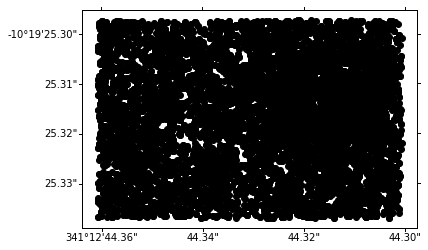

In [46]:
ax = plt.subplot(projection=owcs)
ax.plot(coords.ra, coords.dec, 'ok')

In [47]:
t1 = table[50:100]
t2 = table[200:280]

In [48]:
from astropy.table import vstack

In [49]:
t3 = vstack([t1, t2])

In [50]:
t3

modelfit_CModel_dev_flux_inner,modelfit_CModel_fluxSigma,modelfit_CModel_initial_flag_apCorr,modelfit_CModel_apCorrSigma,modelfit_CModel_flux_inner,modelfit_CModel_initial_flag_numericError,modelfit_CModel_exp_flag_badReference,modelfit_CModel_dev_fluxSigma,modelfit_CModel_flux,modelfit_CModel_flag_badReference,objectId,modelfit_CModel_dev_flux,modelfit_CModel_initial_flux,modelfit_CModel_flag_noShapeletPsf,modelfit_CModel_exp_apCorr,modelfit_CModel_apCorr,modelfit_CModel_fracDev,modelfit_CModel_initial_flag_badReference,modelfit_CModel_initial_flag,modelfit_CModel_flag_region_maxBadPixelFraction,modelfit_CModel_flag,modelfit_CModel_exp_fluxSigma,modelfit_CModel_initial_apCorrSigma,modelfit_CModel_exp_flag,modelfit_CModel_flag_region_maxArea,modelfit_CModel_flag_badCentroid,modelfit_CModel_dev_apCorr,modelfit_CModel_initial_flux_inner,modelfit_CModel_dev_flag_badReference,coord_ra,tract,modelfit_CModel_exp_flux_inner,modelfit_CModel_exp_flag_apCorr,modelfit_CModel_dev_apCorrSigma,modelfit_CModel_initial_fluxSigma,modelfit_CModel_dev_flag_numericError,modelfit_CModel_dev_flag_apCorr,modelfit_CModel_initial_apCorr,modelfit_CModel_flag_apCorr,patch,filter,modelfit_CModel_objective,modelfit_CModel_exp_apCorrSigma,coord_dec,modelfit_CModel_dev_flag,modelfit_CModel_exp_flag_numericError,modelfit_CModel_exp_flux,modelfit_CModel_mag,modelfit_CModel_magSigma,modelfit_CModel_dev_mag,modelfit_CModel_dev_magSigma,modelfit_CModel_initial_mag,modelfit_CModel_initial_magSigma,modelfit_CModel_exp_mag,modelfit_CModel_exp_magSigma,x_Src,y_Src,coord_ra_deg,coord_dec_deg
float64,float64,bool,float64,float64,bool,bool,float64,float64,bool,int64,float64,float64,bool,float64,float64,float64,bool,bool,bool,bool,float64,float64,bool,bool,bool,float64,float64,bool,float64,int64,float64,bool,float64,float64,bool,bool,float64,bool,bytes3,bytes1,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7.97101516798,0.537866655422,True,nan,7.97101566016,False,False,0.537866653896,11.7884470816,False,1099914281524,11.7884474445,11.6843602445,False,nan,nan,1.0,False,False,False,False,0.532610813087,nan,False,False,False,nan,7.95637265002,False,5.94883692289,0,7.9505027565,True,nan,0.533303486375,False,True,nan,True,"1,3",u,0.0860865682277,nan,-0.169063260503,False,False,11.6671174024,24.3213585043,0.0495384419238,24.3213584709,0.049538440258,24.330987654,0.0495557215941,24.3325910799,0.0495645001993,7391.85004557,12403.2215501,340.843248693,-9.68661129754
58.5891331201,1.39387372416,True,nan,58.5891410486,False,False,1.3938735365,96.1054384093,False,1099914281563,96.1054087615,60.4684509168,False,nan,nan,1.0,False,False,False,False,0.860976698972,nan,False,False,False,nan,55.6630338043,False,5.94957623526,0,53.8755780733,True,nan,0.88189594988,False,True,nan,True,"1,3",u,1.25372757679,nan,-0.169028227527,False,False,58.4088764703,22.0431300895,0.0157470710527,22.0431304245,0.0157470737905,22.5461778926,0.0158348088482,22.583802869,0.0160043067085,6579.197688,12441.161864,340.885608172,-9.68460405588
7.27024329663,0.478167049238,True,nan,7.27024316788,False,False,0.478167128216,11.0825242647,False,1099914281564,11.0825247311,11.0802212746,False,nan,nan,1.0,False,False,False,False,0.477328985656,nan,False,False,False,nan,7.26989902773,False,5.94898423655,0,7.2640432699,True,nan,0.478073005293,False,True,nan,True,"1,3",u,0.0623994985528,nan,-0.169024150121,False,False,11.0607972646,24.3884032729,0.0468452190928,24.3884032272,0.0468452248588,24.3886289164,0.0468457404864,24.3905339197,0.0468549733721,7229.8771453,12446.61387,340.851689144,-9.68437043772
28.7652869385,0.540336551487,True,nan,28.7652854919,False,False,0.540336569209,44.5168282634,False,1099914281565,44.5168294641,44.5315552302,False,nan,nan,1.0,False,False,False,False,0.540684939787,nan,False,False,False,nan,28.7689221724,False,5.94934383953,0,28.7731962291,True,nan,0.540505988017,False,True,nan,True,"1,3",u,0.1247818